# Covid-19 infección en Ecuador. Modelos probabilisticos
Implementacion de un modelo probabilistico de infección por el virus Covid-19

Se realiza un análisis probabilistico simple del crecimiento de la infección en Python y el modelos para comprender mejor la evolución de la infección.

Se crea modelos de series temporales del número total de personas infectadas hasta la fecha (es decir, las personas realmente infectadas más las personas que han sido infectadas). Estos modelos tienen parámetros , que se estimarán por ajuste de probabilidad.

In [35]:
# Importar las librerias para el analasis
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline


In [36]:
# Actualizar los datos (URL)
url = 'https://covid.ourworldindata.org/data/ecdc/new_cases.csv'
df = pd.read_csv(url)
df

,date,World,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,...,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Wallis and Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
0,2019-12-31,27,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1,2020-01-01,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,2020-01-02,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3,2020-01-03,17,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
4,2020-01-04,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,2020-11-25,561704,185.0,744.0,1133.0,47.0,141.0,0.0,1.0,7434.0,...,192.0,0.0,0.0,355.0,4.0,0.0,0.0,7.0,12.0,90.0
331,2020-11-26,649666,200.0,644.0,1025.0,77.0,108.0,0.0,0.0,8593.0,...,188.0,0.0,0.0,319.0,5.0,1.0,0.0,10.0,69.0,110.0
332,2020-11-27,549900,0.0,656.0,1085.0,106.0,79.0,0.0,1.0,9043.0,...,182.0,0.0,0.0,0.0,10.0,0.0,0.0,13.0,18.0,115.0
333,2020-11-28,616139,214.0,645.0,NaN,76.0,NaN,0.0,0.0,7846.0,...,0.0,0.0,0.0,398.0,8.0,0.0,0.0,11.0,16.0,91.0


Imprimos los resultados y agregamos el numero del dia


In [37]:
df = df.loc[:,['date','Ecuador']] #Selecciono las columnas de analasis
# Expresar las fechas en numero de dias desde el 01 Enero
FMT = '%Y-%m-%d'
date = df['date']
df['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)
df

,date,Ecuador
0,-1,0.0
1,0,0.0
2,1,0.0
3,2,0.0
4,3,0.0
...,...,...
330,329,492.0
331,330,794.0
332,331,908.0
333,332,1396.0


<AxesSubplot:xlabel='date'>

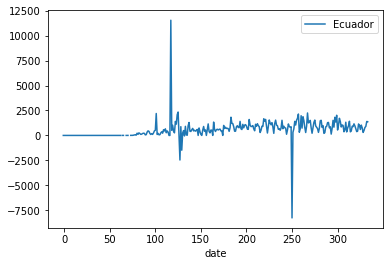

In [38]:
df.plot(x ='date', y='Ecuador')

<center><h1>El modelo probabilidad</h1></center>

Modelo probabilístico o estadístico es la forma que pueden tomar un conjunto de datos obtenidos de muestreos de datos con comportamiento que se supone aleatorio.

Un modelo estadístico es un tipo de modelo matemático que usa la probabilidad, y que incluye un conjunto de asunciones sobre la generación de algunos datos muestrales, de tal manera que asemejen a los datos de una población mayor.

Las asunciones o hipótesis de un modelo estadístico describen un conjunto de distribuciones de probabilidad, que son capaces de aproximar de manera adecuada un conjunto de datos. Las distribuciones de probabilidad inherentes de los modelos estadísticos son lo que distinguen a los modelos de otros modelos matemáticos deterministas.

Un modelo estadístico queda especificado por un conjunto de ecuaciones que relacionan diversas variables aleatorias, y en las que pueden aparecer otras variables no aleatorias. Como tal "un modelo es una representación formal de una teoría.

##### Para ello vamos a realizar este modelo para  ver el crecimiento de personas infectados pro el covid-19 para ello tenemso un  corpues que nos ayudara como  taza de crecimento para los infectos y poder tener un factor de crecimiento

### Vamos a filtar los datos

Vamos a filtramos los datos solo  del pais Ecuador para  ver el numero de personas infectas

In [41]:
fEcu = df["Ecuador"][61:] 

### Obtenemos la media

In [43]:
media = fEcu.mean()
mediana = fEcu.median()
print("Media : ",media)
print("Mediana : ",media)

Media :  709.6988847583643
Mediana :  709.6988847583643


### Verificacion

Con los datos que hemos sacado como la media y la mediana  podemos ver como estas creciendo los caso de infectados y poder tener un conportamiento de la pandemia  mediante la ecuacion de la recta.

Vamos a leer  el curpus mediante  un link  de una archivo que  es CVS y poder sacar lso datos  que necesitamos

In [57]:
FM = '%Y-%m-%d'
url = 'https://covid.ourworldindata.org/data/ecdc/total_cases.csv'
dfn = pd.read_csv(url)
dfn

,date,World,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,...,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Wallis and Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
0,2019-12-31,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-01,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-02,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-03,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-04,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,2020-11-25,59903030,45202.0,34300.0,77000.0,6351.0,14634.0,4.0,140.0,1381782.0,...,72039.0,1.0,26.0,100498.0,1316.0,2.0,766.0,2114.0,17466.0,9398.0
331,2020-11-26,60552696,45402.0,34944.0,78025.0,6428.0,14742.0,4.0,140.0,1390375.0,...,72227.0,1.0,26.0,100817.0,1321.0,3.0,766.0,2124.0,17535.0,9508.0
332,2020-11-27,61102596,45402.0,35600.0,79110.0,6534.0,14821.0,4.0,141.0,1399418.0,...,72409.0,1.0,26.0,100817.0,1331.0,3.0,766.0,2137.0,17553.0,9623.0
333,2020-11-28,61718735,45616.0,36245.0,NaN,6610.0,NaN,4.0,141.0,1407264.0,...,72409.0,1.0,26.0,101215.0,1339.0,3.0,766.0,2148.0,17569.0,9714.0


In [58]:
date = dfn['date']
dfn['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)

### Vamos a seleccionar la columna que vamos a analisar 

In [59]:
dfn = dfn.loc[:,['date','Ecuador']] #Selecciono las columnas de analisis

### Vamos a extraer los datos que vamos  a utilizar
Datos a eextraer:
 - Total de casos "Personas Contagidas por COVID-19"
 - Dias

In [61]:
y = list(dfn.iloc [:, 1]) # Total casos
x = list(dfn.iloc [:, 0]) # Dias

covidP = int(y[-1] + mediana)
print("Predccion : ",covidP)

Predccion :  191579


### Vamos a predecir de aqui a 10  dias de contagios

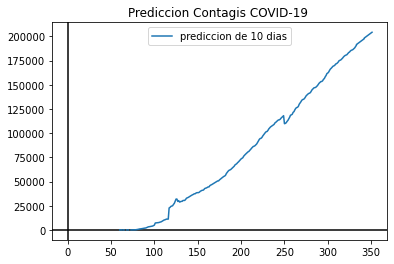

In [63]:
for i in range(x[-1], x[-1]+10):
    x.append(i)
    y.append(int(y[-1] + mediana))
plt.axhline(y=0,color="black")
plt.axvline(x=0,color="black")
plt.title("Prediccion Contagis COVID-19 ")
plt.plot(x[61:], y[61:], label="prediccion de 10 dias")
plt.legend()
plt.show()

# Elaboracion de la Practica para comparacion de los modelos Matematicos vs Probabilisticos


### Modelo Polinomial

Vamos a importar todas las librerias que necesitamos para elaborar  nestra comparacion

In [65]:
import numpy as np
import pandas as pd
import sympy as sp

%matplotlib inline  
from pylab import * 

### Vamos a leer el corpues que se descargo  para pdoer desarrolar la comparacion

In [66]:
df = pd.read_csv('owid-covid-data.csv').fillna(0)
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,0.000,0.0,0.0,0.0,...,35973.781,0.0,0.0,11.62,0.0,0.0,0.0,0.0,76.29,0.0
1,ABW,North America,Aruba,2020-03-19,0.0,0.0,0.286,0.0,0.0,0.0,...,35973.781,0.0,0.0,11.62,0.0,0.0,0.0,0.0,76.29,0.0
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,0.0,0.0,0.0,...,35973.781,0.0,0.0,11.62,0.0,0.0,0.0,0.0,76.29,0.0
3,ABW,North America,Aruba,2020-03-21,0.0,0.0,0.286,0.0,0.0,0.0,...,35973.781,0.0,0.0,11.62,0.0,0.0,0.0,0.0,76.29,0.0
4,ABW,North America,Aruba,2020-03-22,0.0,0.0,0.286,0.0,0.0,0.0,...,35973.781,0.0,0.0,11.62,0.0,0.0,0.0,0.0,76.29,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54385,0,0,International,2020-10-30,696.0,0.0,0.000,7.0,0.0,0.0,...,0.000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0
54386,0,0,International,2020-10-31,696.0,0.0,0.000,7.0,0.0,0.0,...,0.000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0
54387,0,0,International,2020-11-01,696.0,0.0,0.000,7.0,0.0,0.0,...,0.000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0
54388,0,0,International,2020-11-02,696.0,0.0,0.000,7.0,0.0,0.0,...,0.000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0


### Vamos a filtrar los datos
filtracion de los datos solo del ECUADOR 

In [67]:
ndf= df.loc[(df['location'] == 'Ecuador') & (df['total_cases'] != 0)] 

Vamos a sacar o filtrar los datos que vamsoa utilizar para la regresion o modelo que vamso a relizar

In [72]:
ndf1=ndf[['date','total_cases']]
nombre = ["Fecha", "Total de casos"]
ndf1.columns=nombre
ndf1

,Fecha,Total de casos
14430,2020-03-01,1.0
14431,2020-03-02,6.0
14432,2020-03-03,7.0
14434,2020-03-05,10.0
14435,2020-03-06,13.0
...,...,...
14673,2020-10-30,166302.0
14674,2020-10-31,167147.0
14675,2020-11-01,168192.0
14676,2020-11-02,169194.0


### Creacios de arreglos

In [76]:
x=np.arange(1,len(ndf1)+1,1, dtype='float') 
y=np.array(ndf1.values[:,1], dtype='float')

### Vamos  graficar el modelo polinomial  por personas infectadas

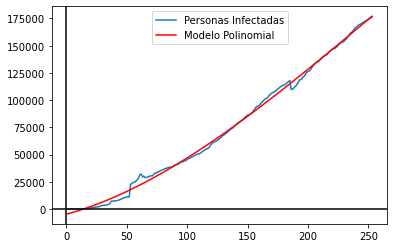

In [90]:
datoX=x
datoY=y
fun1 = np.poly1d(np.polyfit(x, y, 3))
y_pred=fun1(x)
plt.plot(x, y, label= "Personas Infectadas")
plt.plot(x, y_pred, c='red', label="Modelo Polinomial") 
plt.axhline(y=0,color="black")
plt.axvline(x=0,color="black")
plt.legend()
plt.show()

### Metodo Probabilistico

In [14]:
media = ndf1.values[:,1].mean()
mediana = np.median(ndf1.values[:,1])
print("MEDIA: ",media)
print("MEDIANA: ",mediana)

MEDIA:  69294.50617283951
MEDIANA:  61535.0


In [78]:
for it in range(int(x[-1]), int(x[-1]+10)):
    x=np.append(x,(it+1))
    y=np.append(y,y[-1] + mediana)

### Grafica del Metodo 

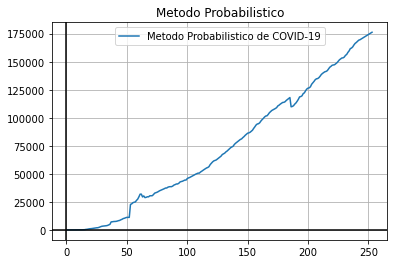

In [82]:
plt.plot(x,y, label="Metodo Probabilistico de COVID-19")
plt.title("Metodo Probabilistico")
plt.axhline(y=0,color="black")
plt.axvline(x=0,color="black")
plt.legend()
plt.grid(True)
plt.show()

In [85]:
predEcu=np.array([])
predEcu=fun1(x)

print ("Día","Probalistico","Polinomial",)

for i,j,k in zip(x,y,predEcu):
    print (i,"   " ,j,"     ",round(k,2))

Día Probalistico Polinomial
1.0     1.0       -4371.04
2.0     6.0       -4061.66
3.0     7.0       -3747.35
4.0     10.0       -3428.14
5.0     13.0       -3104.05
6.0     14.0       -2775.09
7.0     15.0       -2441.28
8.0     17.0       -2102.65
9.0     23.0       -1759.21
10.0     28.0       -1410.99
11.0     37.0       -1058.0
12.0     58.0       -700.26
13.0     111.0       -337.8
14.0     168.0       29.36
15.0     199.0       401.22
16.0     426.0       777.73
17.0     532.0       1158.9
18.0     789.0       1544.69
19.0     981.0       1935.08
20.0     1082.0       2330.06
21.0     1211.0       2729.61
22.0     1403.0       3133.7
23.0     1627.0       3542.32
24.0     1835.0       3955.45
25.0     1890.0       4373.06
26.0     1966.0       4795.13
27.0     2302.0       5221.66
28.0     2758.0       5652.61
29.0     3163.0       6087.96
30.0     3368.0       6527.7
31.0     3465.0       6971.81
32.0     3646.0       7420.27
33.0     3747.0       7873.05
34.0     3995.0       8

### Preccion

Vamos a predecir  un datos de contagias para ver como nos puede ayudar este  metodo lo cual vamos a predecir, retrocediendo  una semana  y vamos a  comparar los dos metodos 

In [86]:

_x=np.arange(1,(len(ndf1)+1)-7,1, dtype='float')
_y=np.array(ndf1.values[:len(ndf1)-7,1], dtype='float')

print ("  Día  ","  Reales  ","  Probalistico  ","  Polinomial  ")

for i,j,k in zip(_x,_y,predEcu):
    print (" ",i,"  "," ",j,"  ","   ",j,"  ","        ",round(k,2))


  Día     Reales     Probalistico     Polinomial  
  1.0      1.0        1.0             -4371.04
  2.0      6.0        6.0             -4061.66
  3.0      7.0        7.0             -3747.35
  4.0      10.0        10.0             -3428.14
  5.0      13.0        13.0             -3104.05
  6.0      14.0        14.0             -2775.09
  7.0      15.0        15.0             -2441.28
  8.0      17.0        17.0             -2102.65
  9.0      23.0        23.0             -1759.21
  10.0      28.0        28.0             -1410.99
  11.0      37.0        37.0             -1058.0
  12.0      58.0        58.0             -700.26
  13.0      111.0        111.0             -337.8
  14.0      168.0        168.0             29.36
  15.0      199.0        199.0             401.22
  16.0      426.0        426.0             777.73
  17.0      532.0        532.0             1158.9
  18.0      789.0        789.0             1544.69
  19.0      981.0        981.0             1935.08
  20.0      108

  220.0      146828.0        146828.0             146478.93
  221.0      147033.0        147033.0             147390.32
  222.0      147315.0        147315.0             148302.27
  223.0      148171.0        148171.0             149214.74
  224.0      149083.0        149083.0             150127.73
  225.0      150360.0        150360.0             151041.21
  226.0      151659.0        151659.0             151955.16
  227.0      152422.0        152422.0             152869.56
  228.0      153289.0        153289.0             153784.4
  229.0      153423.0        153423.0             154699.65
  230.0      154115.0        154115.0             155615.29
  231.0      155625.0        155625.0             156531.31
  232.0      156451.0        156451.0             157447.68
  233.0      158270.0        158270.0             158364.38
  234.0      159614.0        159614.0             159281.39
  235.0      161635.0        161635.0             160198.7
  236.0      162178.0        162178.0     

In [95]:
dato_x=datoX**2

dato_y=datoY**2

dato_xy=datoX*datoY

resultado=(len(datoX)*sum(dato_xy)-(sum(datoX)*sum(datoY)))/(sqrt(len(datoX)*sum(dato_x)-(sum(datoX)**2))*sqrt(len(datoX)*sum(dato_y)-(sum(datoY)**2)))

print("El coeficiente de correlación : ",resultado)

El coeficiente de correlación :  0.9925462010248806


### Puntos extras
Investiga sobre la correlacion de variables y aplicar el calculo en base a los datos del Ecuador.



# Correlación entre variables
La correlacion es una técnica estadística que indica la fuerza y la dirección de una relación lineal y proporcionalidadque que se utiliza para determinar Dos o más variables

Esto quiere decir que  dos variables estans  asociadas, cuando una variable nos da informacion  acerca de la otra por ello  si la variables no exite asociacion, aumenta o disminucion de una variable esto  no nos dice nada sobre  el comprotamiento de la otra varible por lo que  dos variabes se correlacionan cuando  muestran una tendencia creciente o decreciente
#### la correlacion nos permite medir el signo  de la tendencia  entre dos variables

## Coeficiente de correlación
El Coeficiente de Correlación o tambien conocido como "Coeficiente de Correlacion lieal" que nos permite cuantificar  el grado de  veriacion conjuta entre dos variables.

El coeficiente de correlacion de representa mendiente  la letra " r"

Puede varias desde -1 hasta  1 lo cuals no  existe una relacion entre las variables cuando el coeficiente es 0.

El coeficiente de correlación lineal toma valores cercanos a -1 la correlación es fuerte e inversa, y será tanto más fuerte cuanto más se aproxime a -1.

El coeficiente de correlación lineal toma valores cercanos a 0, la correlación es débil.

Si r=1 ó r=-1, los puntos de la nube están sobre la recta creciente o decreciente. Entre ambas variables hay dependencia funcional.


## Analisis

Hay que tener en cuenta qe los dos metodos  son buenos pero unso de ellos es mejor que  el otro  no por que es malo si no que por porblemas como este no se puede aplicar el modelo probabilisto  ya que cuneta con  un margen de error por los saltos del tiempo en la vida real, mientras que el modelo polimonial el margen de error es menor que los el otro modelo ya que se basa en una funciones matematicaas como la media, media, y la ecuacion de la recta.

## Conclusiones

como conclusion  podemos decir que cada modelo que exite es bueno ninguno es malo si no que ahiq eu saberlos aplicar en  el momento exacto para poder tener un desempeño limpi


# Referencias

-http://viref.udea.edu.co/contenido/menu_alterno/apuntes/ac36-correlacion-variables.pdf


- https://www.maximaformacion.es/blog-dat/que-es-la-correlacion-estadistica-y-como-interpretarla/
- https://www.researchgate.net/publication/340092755_Infeccion_del_Covid-19_en_Colombia_Una_comparacion_de_modelos_logisticos_y_exponenciales_aplicados_a_la_infeccion_por_el_virus_en_Colombia

- https://www.ccg.unam.mx/~vinuesa/R4biosciences/docs/Tema8_correlacion.html

- https://www.aprendemachinelearning.com/regresion-lineal-en-espanol-con-python/

- https://www.superprof.es/apuntes/escolar/matematicas/estadistica/disbidimension/coeficiente-de-correlacion.html